# MACHINE LEARNING MODELS

In [59]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(color_codes=True)

from subprocess import check_output


In [61]:
df = pd.read_csv('mushrooms.csv')

In [62]:
df.shape

(8124, 23)

In [63]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Class Distribution

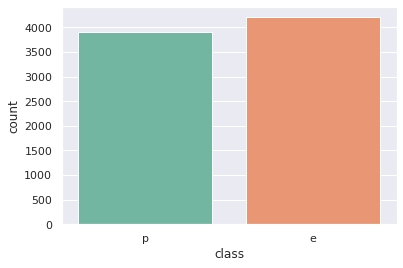

In [65]:
sns.countplot(x="class", data=df, palette="Set2")

In [66]:
class_dist = df['class'].value_counts()

print(class_dist)

e    4208
p    3916
Name: class, dtype: int64


In [67]:
prob_e = class_dist[0]/(class_dist[0]+class_dist[1])
prob_p = 1 - prob_e
print(prob_e)
print(prob_p)

0.517971442639094
0.482028557360906


# Feature Transformation

In [68]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Pearson Correalation HeatMap

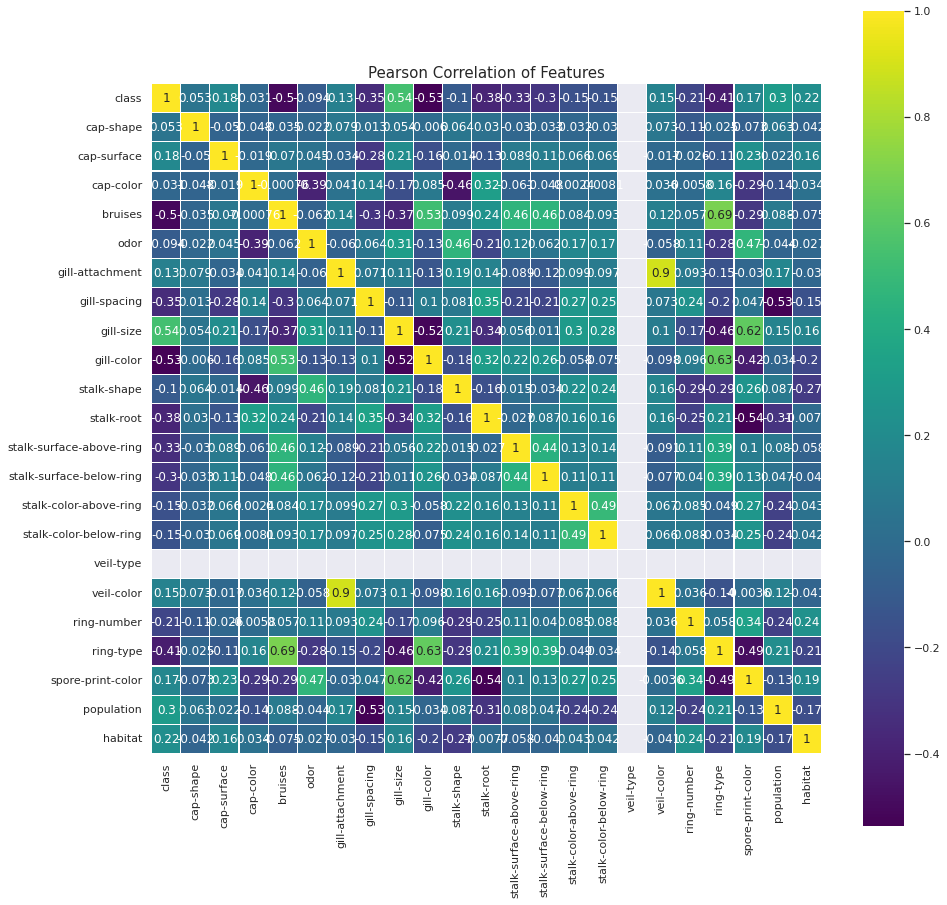

In [69]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)

sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

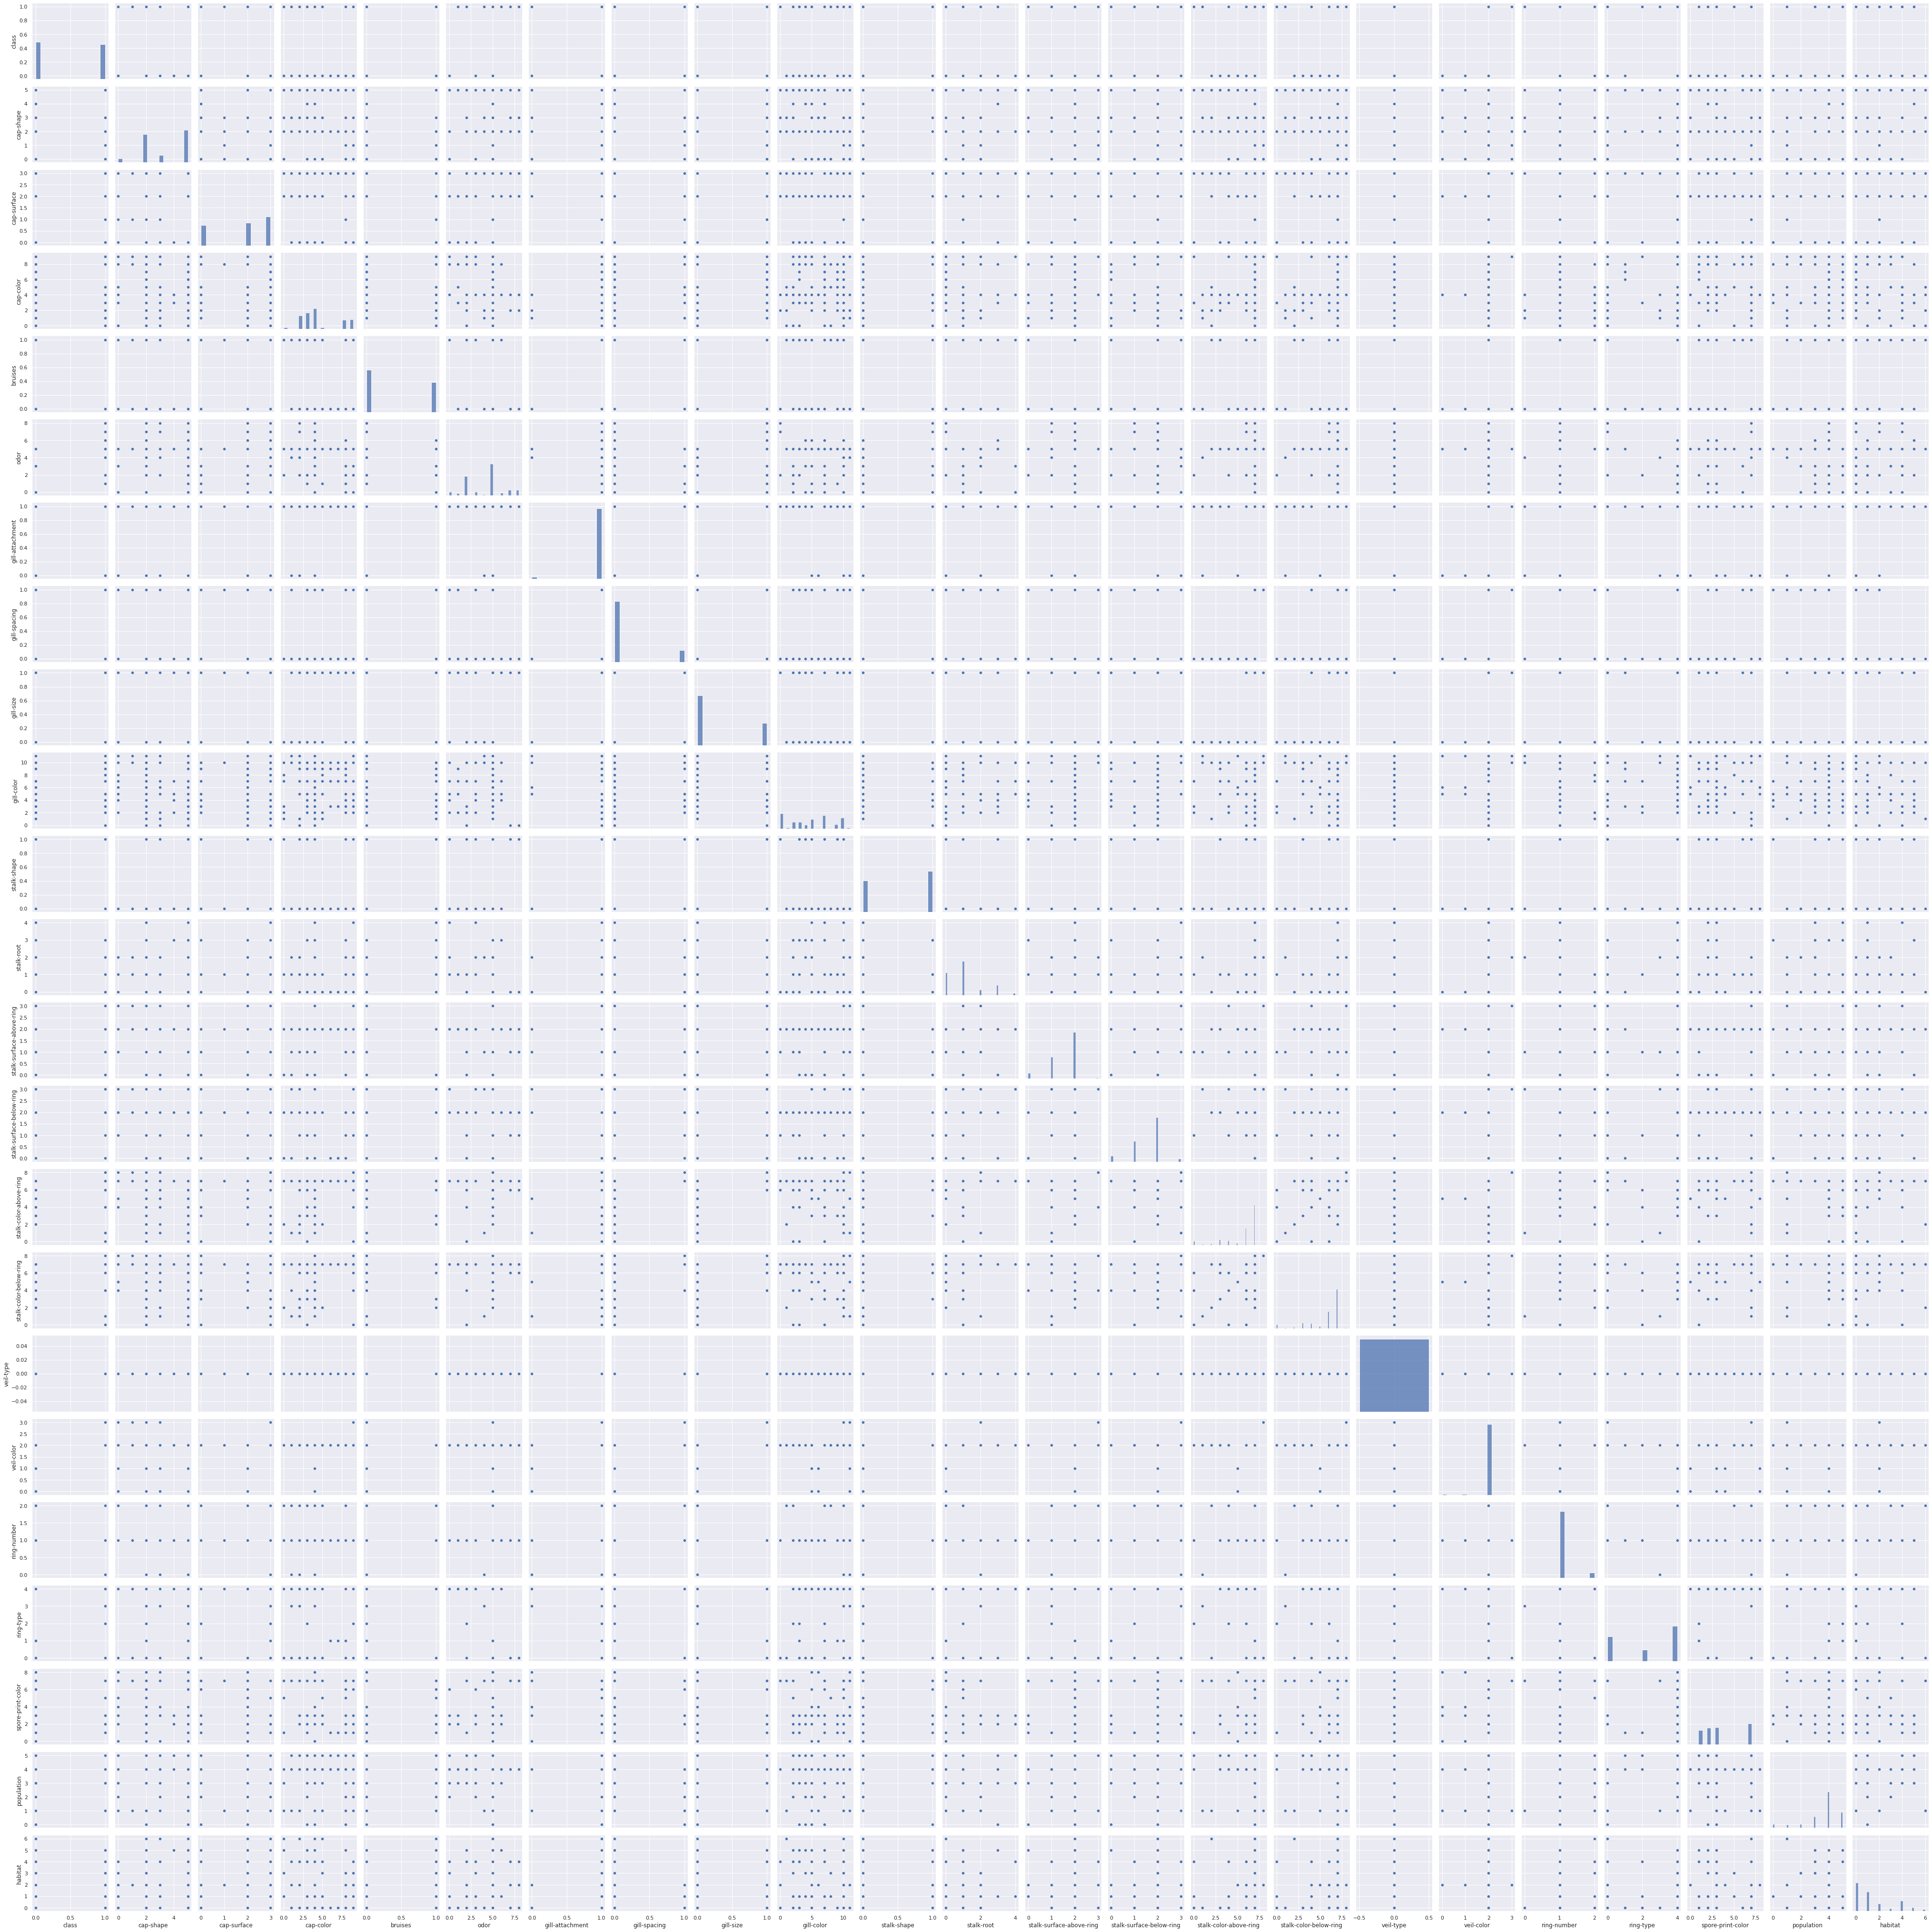

In [70]:
sns.pairplot(df)

# Classification Models

In [71]:
X = df.drop('class', axis=1)
y = df['class']
RS = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

In [72]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Linear Regression

LR vs Decision Tree :

    Decision trees supports non linearity, where LR supports only linear solutions.
    When there are large number of features with less data-sets(with low noise), linear regressions may outperform Decision trees/random forests. In general cases, Decision trees will be having better average accuracy.
    For categorical independent variables, decision trees are better than linear regression.
    Decision trees handles colinearity better than LR.
    

LR vs SVM :

    SVM supports both linear and non-linear solutions using kernel trick.
    SVM handles outliers better than LR.
    Both perform well when the training data is less, and there are large number of features.

LR vs KNN :

    KNN is a non -parametric model, whereas LR is a parametric model.
    KNN is slow in real time as it have to keep track of all training data and find the neighbor nodes, whereas LR can easily extract output from the tuned θ coefficients.

LR vs Neural Networks :

    Neural networks need large training data compared to LR model, whereas LR can work well even with less training data.
    NN will be slow compared to LR.
    Average accuracy will be always better with neural networks.

# Logistic Refression

Logistic regression vs SVM :

    SVM can handle non-linear solutions whereas logistic regression can only handle linear solutions.
    Linear SVM handles outliers better, as it derives maximum margin solution.
    Hinge loss in SVM outperforms log loss in LR.

Logistic Regression vs Decision Tree :

    Decision tree handles colinearity better than LR.
    Decision trees cannot derive the significance of features, but LR can.
    Decision trees are better for categorical values than LR.

Logistic Regression vs Neural network :

    NN can support non-linear solutions where LR cannot.
    LR have convex loss function, so it wont hangs in a local minima, whereas NN may hang.
    LR outperforms NN when training data is less and features are large, whereas NN needs large training data.

Logistic Regression vs Naive Bayes :

    Naive bayes is a generative model whereas LR is a discriminative model.
    Naive bayes works well with small datasets, whereas LR+regularization can achieve similar performance.
    LR performs better than naive bayes upon colinearity, as naive bayes expects all features to be independent.

Logistic Regression vs KNN :

    KNN is a non-parametric model, where LR is a parametric model.
    KNN is comparatively slower than Logistic Regression.
    KNN supports non-linear solutions where LR supports only linear solutions.
    LR can derive confidence level (about its prediction), whereas KNN can only output the labels.

In [73]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 99.9385%
Log Loss: 0.0011751030799298835
SVC
****Results****
Accuracy: 90.8923%
Log Loss: 0.24025742957686372
NuSVC
****Results****
Accuracy: 88.9846%
Log Loss: 0.2692368037362991
DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 9.992007221626413e-16
RandomForestClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 0.0002427986899657884
XGBClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 0.004926442726721199
AdaBoostClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 0.4860313502269329
GradientBoostingClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 0.0030883978406223184
GaussianNB
****Results****
Accuracy: 90.6462%
Log Loss: 0.7449519795304806
LinearDiscriminantAnalysis
****Results****
Accuracy: 94.3385%
Log Loss: 0.30987803866199237
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 80.1846%
Log Loss: 6.494568167627914


# K-nearest neighbors

KNN vs naive bayes :

    Naive bayes is much faster than KNN due to KNN’s real-time execution.
    Naive bayes is parametric whereas KNN is non-parametric.

KNN vs linear regression :

    KNN is better than linear regression when the data have high SNR.

KNN vs SVM :

    SVM take cares of outliers better than KNN.
    If training data is much larger than no. of features(m>>n), KNN is better than SVM. SVM outperforms KNN when there are large features and lesser training data.

KNN vs Neural networks :

    Neural networks need large training data compared to KNN to achieve sufficient accuracy.
    NN needs lot of hyperparameter tuning compared to KNN.

# Decision Tree

Decision tree vs Random Forest :

    Random Forest is a collection of decision trees and average/majority vote of the forest is selected as the predicted output.
    Random Forest model will be less prone to overfitting than Decision tree, and gives a more generalized solution.
    Random Forest is more robust and accurate than decision trees.



Decision tree vs KNN :

    Both are non-parametric methods.
    Decision tree supports automatic feature interaction, whereas KNN cant.
    Decision tree is faster due to KNN’s expensive real time execution.

Decision tree vs naive Bayes :

    Decision tree is a discriminative model, whereas Naive bayes is a generative model.
    Decision trees are more flexible and easy.
    Decision tree pruning may neglect some key values in training data, which can lead the accuracy for a toss.

Decision tree vs neural network :

    Both finds non-linear solutions, and have interaction between independent variables.
    Decision trees are better when there is large set of categorical values in training data.
    Decision trees are better than NN, when the scenario demands an explanation over the decision.
    NN outperforms decision tree when there is sufficient training data.

Decision tree vs SVM :

    SVM uses kernel trick to solve non-linear problems whereas decision trees derive hyper-rectangles in input space to solve the problem.
    Decision trees are better for categorical data and it deals colinearity better than SVM.

# Multiple Classifier

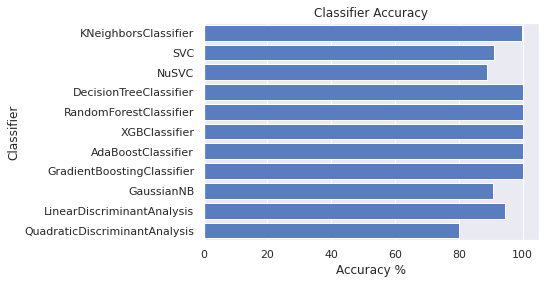

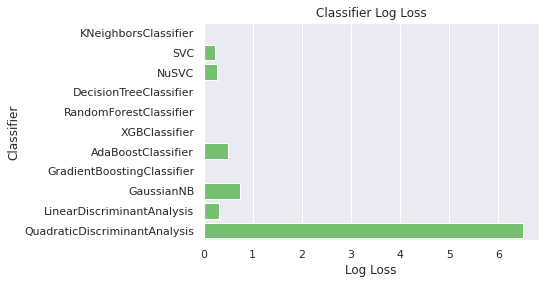

In [74]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

# Conclusion : 

In [75]:
clf = DecisionTreeClassifier()

clf.fit(X, y)

DecisionTreeClassifier()

In [76]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%s : (%f)" % (feature_names[f] , importances[indices[f]]))

Feature ranking:
cap-shape : (0.341473)
cap-surface : (0.207163)
cap-color : (0.176778)
bruises : (0.116062)
odor : (0.036499)
gill-attachment : (0.028572)
gill-spacing : (0.025695)
gill-size : (0.025186)
gill-color : (0.017071)
stalk-shape : (0.011624)
stalk-root : (0.003944)
stalk-surface-above-ring : (0.003698)
stalk-surface-below-ring : (0.002972)
stalk-color-above-ring : (0.001946)
stalk-color-below-ring : (0.001318)
veil-type : (0.000000)
veil-color : (0.000000)
ring-number : (0.000000)
ring-type : (0.000000)
spore-print-color : (0.000000)
population : (0.000000)
habitat : (0.000000)


Text(0.5, 0, 'index of the feature')

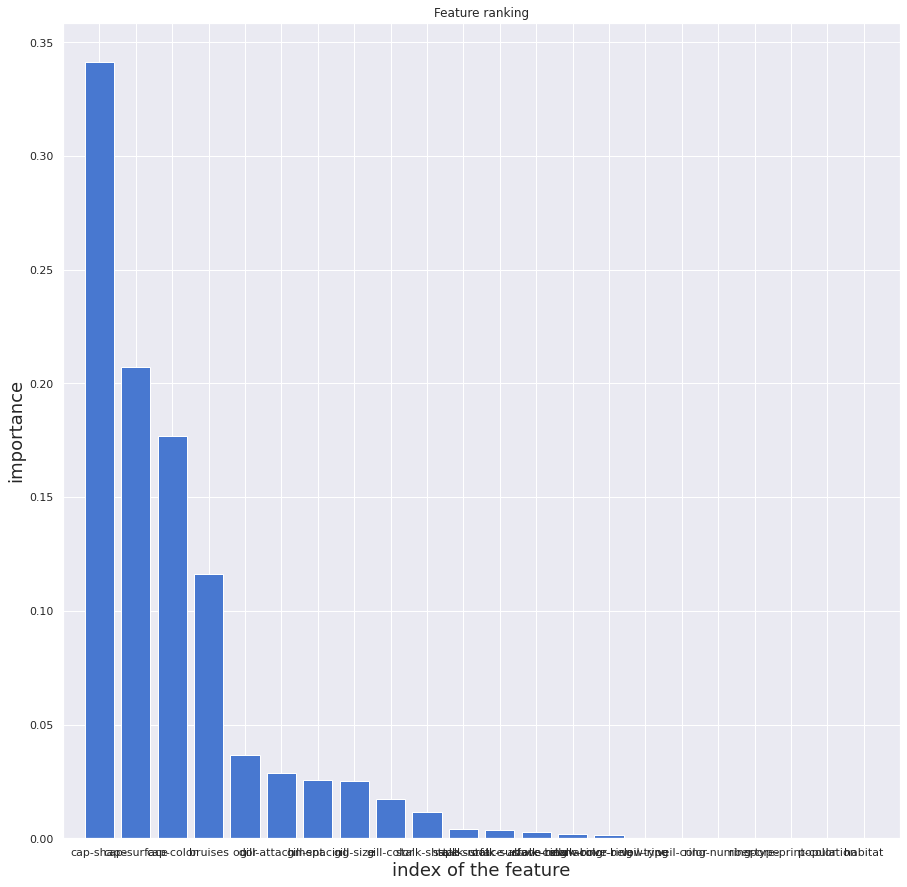

In [77]:
f, ax = plt.subplots(figsize=(15, 15))
plt.title("Feature ranking", fontsize = 12)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)